from gitpod console

gitpod /workspace/boilerplate-page-view-time-series-visualizer (main) $ pip freeze | egrep "pandas|numpy|matplo|seabo"
matplotlib==3.7.5
numpy==1.24.4
pandas==1.5.3
seaborn==0.9.0

In [38]:
# !pip uninstall -y numpy pandas matplotlib --quiet

In [39]:
# lets install numpy 1.23.1
# !pip install numpy==1.24.4  matplotlib==1.4.3
!pip install -r requirements.txt

In [1]:
!pip freeze |egrep "seaborn|pandas|numpy|matplot"

matplotlib==3.7.5
matplotlib-inline==0.1.7
numpy==1.24.4
pandas==1.5.3
seaborn==0.9.0


vs code needs to be closed and restarted before continuing, matplotlib reinstall needs that

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Matplotlib is building the font cache; this may take a moment.


## Load data

In [112]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
# df = None

df = pd.read_csv( 'fcc-forum-pageviews.csv' , index_col='date'  )

In [113]:
#confirm
df.head(3)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716


In [114]:
df.shape

(1304, 1)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4+ KB


## Clean data
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [116]:
#low
low_drop_limit = df['value'].quantile(0.025)
low_drop_limit

17876.4

In [117]:
#high limit
high_drop_limit = df['value'].quantile(1-0.025)
high_drop_limit

177613.075

In [118]:
%%time
# this works

df[ (df['value'] >= low_drop_limit ) & (df['value'] <= high_drop_limit ) ]
# df

CPU times: user 2.77 ms, sys: 0 ns, total: 2.77 ms
Wall time: 2.48 ms


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [119]:
low_drop_limit_indexes = df[df['value'] <= low_drop_limit].index
low_drop_limit_indexes

Index(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12', '2016-05-13',
       '2016-05-14', '2016-05-15', '2016-05-16', '2016-05-17', '2016-05-18',
       '2016-05-20', '2016-05-21', '2016-05-22', '2016-05-23', '2016-05-24',
       '2016-05-25', '2016-05-30', '2016-05-31', '2016-06-01', '2016-06-02',
       '2016-06-03', '2016-06-04', '2016-06-05', '2016-06-06', '2016-06-10',
       '2016-06-11', '2016-06-12', '2016-06-13', '2016-06-16', '2016-07-19',
       '2016-07-30', '2016-07-31', '2018-10-02'],
      dtype='object', name='date')

In [120]:
high_drop_limit_indexes = df[df['value'] >= high_drop_limit].index
high_drop_limit_indexes

Index(['2018-10-14', '2018-10-16', '2019-06-17', '2019-06-18', '2019-07-10',
       '2019-08-06', '2019-08-07', '2019-10-16', '2019-10-21', '2019-10-22',
       '2019-10-23', '2019-10-24', '2019-10-28', '2019-10-29', '2019-10-30',
       '2019-10-31', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07',
       '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
       '2019-11-18', '2019-11-19', '2019-11-22', '2019-11-25', '2019-11-26',
       '2019-11-27', '2019-11-28', '2019-12-02'],
      dtype='object', name='date')

In [121]:
%%time
# this other method works too, but it takes a bit more time.  
# just investigated how to do it this way to learn more

# 
# low_drop_limit_indexes = df[df['value'] <= low_drop_limit].index
# high_drop_limit_indexes = df[df['value'] >= high_drop_limit].index
# df.drop( low_drop_limit_indexes ,inplace=True )
# df.drop(high_drop_limit_indexes,inplace=True)
# df

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs


In [122]:
# Clean data
# Clean the data by filtering out days when the page views were 
# in the top 2.5% of the dataset or bottom 2.5% of the dataset.
low_drop_limit = df['value'].quantile(0.025)
high_drop_limit = df['value'].quantile(1-0.025)
df = df[ (df['value'] >= low_drop_limit ) & (df['value'] <= high_drop_limit ) ]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [130]:
# less rows than original, as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3+ KB


In [161]:
# making sure cleanup worked, it does
df.describe().loc[('max' , 'min'),:] , high_drop_limit , low_drop_limit

(        value
 max  177588.0
 min   18060.0,
 177613.075,
 17876.4)

In [141]:
# index still as object and not datetime .  not changing it yet as excercise does not says that
df.index.dtype.name

'object'

## Create a draw_line_plot function that uses Matplotlib

In [168]:
df.index.min() , df.index.max() 

('2016-05-19', '2019-12-03')

In [169]:
df.index.values

array(['2016-05-19', '2016-05-26', '2016-05-27', ..., '2019-11-30',
       '2019-12-01', '2019-12-03'], dtype=object)

In [170]:
df.values

array([[ 19736],
       [ 18060],
       [ 19997],
       ...,
       [141161],
       [142918],
       [158549]])

In [171]:
#Create a draw_line_plot function that uses Matplotlib to draw 
# a line chart similar to "examples/Figure_1.png". 
# The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
# The label on the x axis should be Date and the label on the y axis should be Page Views.

# def draw_line_plot():
    # Draw line plot

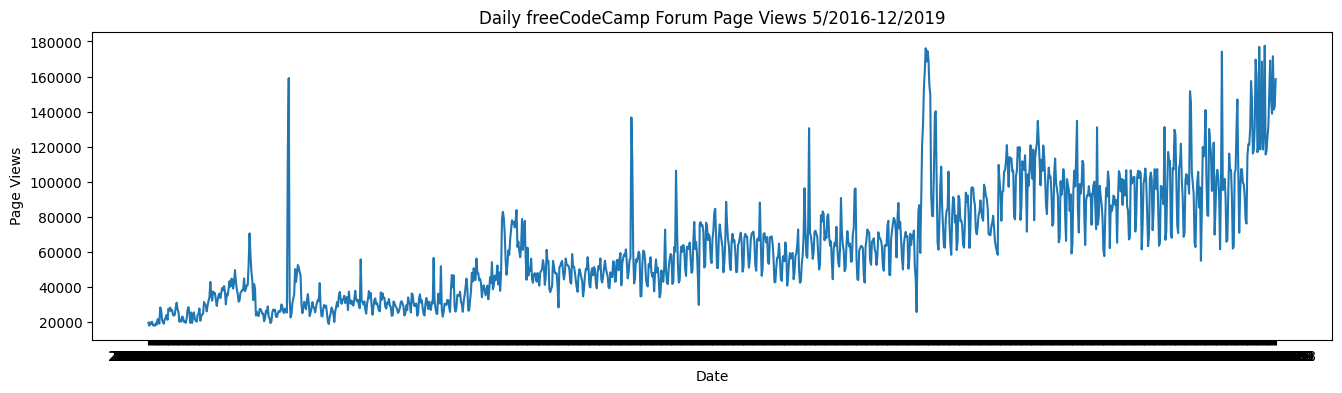

In [173]:
# This is the text that goes inside the function

fig, ax = plt.subplots(figsize=(16,4))
ax.plot (df.index.values, df.values)
ax.set(xlabel='Date', ylabel='Page Views',
       title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
# ax.grid()
plt.show()

## Create a draw_bar_plot function that draws a bar chart 

In [ ]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
# It should show average daily page views for each month grouped by year. 
# The legend should show month labels and have a title of Months. On the chart, 
# the label on the x axis should be Years and the label on the y axis should be Average Page Views.

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig